In [1]:
import pandas as pd
import re 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Ecommerce Customers.csv')

In [3]:
df

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092
...,...,...,...,...,...,...,...,...
495,lewisjessica@craig-evans.com,"4483 Jones Motorway Suite 872\nLake Jamiefurt,...",Tan,33.237660,13.566160,36.417985,3.746573,573.847438
496,katrina56@gmail.com,"172 Owen Divide Suite 497\nWest Richard, CA 19320",PaleVioletRed,34.702529,11.695736,37.190268,3.576526,529.049004
497,dale88@hotmail.com,"0787 Andrews Ranch Apt. 633\nSouth Chadburgh, ...",Cornsilk,32.646777,11.499409,38.332576,4.958264,551.620145
498,cwilson@hotmail.com,"680 Jennifer Lodge Apt. 808\nBrendachester, TX...",Teal,33.322501,12.391423,36.840086,2.336485,456.469510


In [4]:
def email(x):
    x = x.strip('.com')
    return x

In [5]:
df['Email'].apply(email)

0          stephenson@fernandez
1                 hduke@hotmail
2                    pallen@yah
3           riverarebecca@gmail
4      stephens@davidson-herman
                 ...           
495    lewisjessica@craig-evans
496             katrina56@gmail
497              dale88@hotmail
498              wilson@hotmail
499       hannahwilson@davidson
Name: Email, Length: 500, dtype: object

In [6]:
df['Email'].str.split('@').str[0]

0        mstephenson
1              hduke
2             pallen
3      riverarebecca
4          mstephens
           ...      
495     lewisjessica
496        katrina56
497           dale88
498          cwilson
499     hannahwilson
Name: Email, Length: 500, dtype: object

In [7]:
df['Address'].sample(5)
# street code street \nCity , State code SPACE Zipcode 

423         31927 Jill Mountain\nSouth Jessica, MN 63418
117              18219 Jackson Well\nFosterton, MP 85302
187    55479 Peters Field Apt. 702\nNorth Micheleberg...
458          02342 Melissa Islands\nSmithhaven, KS 68335
209    50593 Wells Roads Apt. 110\nSouth Amy, MI 0696...
Name: Address, dtype: object

In [8]:
df['Address'].apply(
                    lambda x : re.findall(r'(?<=\n)(.+?)(?=,)',x)
                )

0           [Wrightmouth]
1           [Diazchester]
2           [Cobbborough]
3            [Port Jason]
4       [Port Jacobville]
              ...        
495      [Lake Jamiefurt]
496        [West Richard]
497     [South Chadburgh]
498       [Brendachester]
499    [East Drewborough]
Name: Address, Length: 500, dtype: object

In [9]:
df['Address'].str.extract(
                            r'\n(?P<City>.*?),'
)

,City
0,Wrightmouth
1,Diazchester
2,Cobbborough
3,Port Jason
4,Port Jacobville
...,...
495,Lake Jamiefurt
496,West Richard
497,South Chadburgh
498,Brendachester


In [10]:
df['Address'].sample(5)

237          388 Kelly Pike\nWest Jeffery, DE 44039-7785
111               15810 Karl Plain\nDavidville, TX 64072
304    036 Mary Drive Apt. 581\nPort Brandytown, FL 6...
63     716 Bush Greens Apt. 098\nTrevorton, MA 17817-...
467    845 Colleen Ways\nLake Matthewview, VT 65340-3159
Name: Address, dtype: object

In [11]:
df['Address'].str.extract(
                            r',\s(?P<State>.*?)\s'
)

,State
0,MI
1,CA
2,DC
3,OH
4,PR
...,...
495,UT
496,CA
497,TN
498,TX


In [12]:
df['Address'].sample(5)

197    89300 Amber Centers Apt. 879\nVictoriaton, VT ...
118    572 Michelle Motorway Apt. 889\nNew Craig, ND ...
423         31927 Jill Mountain\nSouth Jessica, MN 63418
48     546 Benjamin Lights Suite 421\nRomerofurt, NC ...
1         4547 Archer Common\nDiazchester, CA 06566-8576
Name: Address, dtype: object

In [13]:
df['Address'].str.extract(
                            r',\s[A-Za-z]{2}\s(?P<ZipCode>.*?)$'
)

,ZipCode
0,82180-9605
1,06566-8576
2,99414-7564
3,22070-1220
4,37242-1057
...,...
495,75292
496,19320
497,56128
498,05000-5873


In [14]:
df['Address'].str.extract(
                            r'(?P<StreetCode>\d.+?)\s'
)

,StreetCode
0,835
1,4547
2,24645
3,1414
4,14023
...,...
495,4483
496,172
497,0787
498,680


In [15]:
df['Address'].str.extract(
                            r'(?P<StreetAddress>.+?)\n'
)

,StreetAddress
0,835 Frank Tunnel
1,4547 Archer Common
2,24645 Valerie Unions Suite 582
3,1414 David Throughway
4,14023 Rodriguez Passage
...,...
495,4483 Jones Motorway Suite 872
496,172 Owen Divide Suite 497
497,0787 Andrews Ranch Apt. 633
498,680 Jennifer Lodge Apt. 808


In [16]:
# Now working on a dirtier dataset

In [17]:
df = pd.read_csv('synthetic_text_cleaning_realworld.csv')

In [18]:
df.head()

,id,user_id,username,email,phone_number,tweet_text,post_text,comment_text,review_text,bio_text,...,product_description,advertisement_text,song_lyrics,movie_script,news_snippet,blog_text,story_text,job_description,company_profile,misc_text
0,1,Download now >>> free link http://spam.com,Data cleaning is very IMPORTANT.....,Check this out >>> https://openai.com,U r the best!! btw I'll c u 2morrow 😉,Data cleaning is very IMPORTANT.....,Email me at test_user123@gmail.com asap!!!,U r the best!! btw I'll c u 2morrow 😉,Café München is beautïful but costly $$$,Download now >>> free link http://spam.com,...,Heeeyyy broooo wassuppp??? 😂😂😂,Breaking news!!!! #AI #NLP @research,Café München is beautïful but costly $$$,Download now >>> free link http://spam.com,RT @someone: This is a RETWEET with #hashtag,Breaking news!!!! #AI #NLP @research,Download now >>> free link http://spam.com,Café München is beautïful but costly $$$,Breaking news!!!! #AI #NLP @research,Download now >>> free link http://spam.com
1,2,Stopwords should be removed from this text in ...,Check this out >>> https://openai.com,Email me at test_user123@gmail.com asap!!!,"Working on NLP??? It's fun, isn't it???",Café München is beautïful but costly $$$,Heeeyyy broooo wassuppp??? 😂😂😂,Heeeyyy broooo wassuppp??? 😂😂😂,123456789 Numbers should be removed!!!,Café München is beautïful but costly $$$,...,Café München is beautïful but costly $$$,123456789 Numbers should be removed!!!,This TEXT has MULTIPLE spaces and --- dash...,U r the best!! btw I'll c u 2morrow 😉,Email me at test_user123@gmail.com asap!!!,Check this out >>> https://openai.com,U r the best!! btw I'll c u 2morrow 😉,Check this out >>> https://openai.com,123456789 Numbers should be removed!!!,<p>Python is GREAT!!!</p> Visit http://example...
2,3,Heeeyyy broooo wassuppp??? 😂😂😂,Stopwords should be removed from this text in ...,Email me at test_user123@gmail.com asap!!!,Café München is beautïful but costly $$$,Breaking news!!!! #AI #NLP @research,Email me at test_user123@gmail.com asap!!!,Data cleaning is very IMPORTANT.....,Check this out >>> https://openai.com,Hello!!! This is a SAMPLE text 😊.,...,Breaking news!!!! #AI #NLP @research,"Working on NLP??? It's fun, isn't it???",U r the best!! btw I'll c u 2morrow 😉,This TEXT has MULTIPLE spaces and --- dash...,RT @someone: This is a RETWEET with #hashtag,Download now >>> free link http://spam.com,Stopwords should be removed from this text in ...,Hello!!! This is a SAMPLE text 😊.,123456789 Numbers should be removed!!!,123456789 Numbers should be removed!!!
3,4,Café München is beautïful but costly $$$,Data cleaning is very IMPORTANT.....,U r the best!! btw I'll c u 2morrow 😉,Stopwords should be removed from this text in ...,U r the best!! btw I'll c u 2morrow 😉,Data cleaning is very IMPORTANT.....,Data cleaning is very IMPORTANT.....,This TEXT has MULTIPLE spaces and --- dash...,Email me at test_user123@gmail.com asap!!!,...,Breaking news!!!! #AI #NLP @research,Stopwords should be removed from this text in ...,This TEXT has MULTIPLE spaces and --- dash...,<p>Python is GREAT!!!</p> Visit http://example...,Café München is beautïful but costly $$$,Café München is beautïful but costly $$$,Breaking news!!!! #AI #NLP @research,123456789 Numbers should be removed!!!,Email me at test_user123@gmail.com asap!!!,Download now >>> free link http://spam.com
4,5,This TEXT has MULTIPLE spaces and --- dash...,This TEXT has MULTIPLE spaces and --- dash...,Check this out >>> https://openai.com,"Working on NLP??? It's fun, isn't it???",123456789 Numbers should be removed!!!,Hello!!! This is a SAMPLE text 😊.,U r the best!! btw I'll c u 2morrow 😉,U r the best!! btw I'll c u 2morrow 😉,Heeeyyy broooo wassuppp??? 😂😂😂,...,Email me at test_user123@gmail.com asap!!!,This TEXT has MULTIPLE spaces and --- dash...,Check this out >>> https://openai.com,Hello!!! This is a SAMPLE text 😊.,Check this out >>> https://openai.com,Café München is beautïful but costly $$$,Check this out >>> https://openai.com,Heeeyyy 

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   id                   2000 non-null   int64 
 1   user_id              2000 non-null   object
 2   username             2000 non-null   object
 3   email                2000 non-null   object
 4   phone_number         2000 non-null   object
 5   tweet_text           2000 non-null   object
 6   post_text            2000 non-null   object
 7   comment_text         2000 non-null   object
 8   review_text          2000 non-null   object
 9   bio_text             2000 non-null   object
 10  headline             2000 non-null   object
 11  article_text         2000 non-null   object
 12  message_text         2000 non-null   object
 13  chat_text            2000 non-null   object
 14  status_text          2000 non-null   object
 15  caption_text         2000 non-null   object
 16  forum_

In [20]:
df.isnull().sum().mean()

np.float64(0.0)

In [21]:
df['user_id'].unique() 

array(['Download now >>> free link http://spam.com',
       'Stopwords should be removed from this text in the end',
       'Heeeyyy broooo wassuppp??? 😂😂😂',
       'Café München is beautïful but costly $$$',
       'This TEXT has MULTIPLE     spaces and --- dashes!!!',
       '123456789 Numbers should be removed!!!',
       'Data cleaning   is      very    IMPORTANT.....',
       'Breaking news!!!! #AI #NLP @research',
       "U r the best!! btw I'll c u 2morrow 😉",
       'Hello!!! This is a SAMPLE text 😊.',
       '<p>Python is GREAT!!!</p> Visit http://example.com now!!!',
       "Working on NLP??? It's fun, isn't it???",
       'Email me at test_user123@gmail.com asap!!!',
       'Check this out >>> https://openai.com',
       'RT @someone: This is a RETWEET with #hashtag'], dtype=object)

In [22]:
df['username'].unique()

array(['Data cleaning   is      very    IMPORTANT.....',
       'Check this out >>> https://openai.com',
       'Stopwords should be removed from this text in the end',
       'This TEXT has MULTIPLE     spaces and --- dashes!!!',
       '123456789 Numbers should be removed!!!',
       'RT @someone: This is a RETWEET with #hashtag',
       "Working on NLP??? It's fun, isn't it???",
       'Heeeyyy broooo wassuppp??? 😂😂😂',
       'Breaking news!!!! #AI #NLP @research',
       "U r the best!! btw I'll c u 2morrow 😉",
       'Email me at test_user123@gmail.com asap!!!',
       'Café München is beautïful but costly $$$',
       '<p>Python is GREAT!!!</p> Visit http://example.com now!!!',
       'Hello!!! This is a SAMPLE text 😊.',
       'Download now >>> free link http://spam.com'], dtype=object)

In [23]:
# Data is rigged 

In [70]:
df = pd.read_csv('Messy_Employment_India_Dataset.csv')

In [71]:
df.head()

,Status,Age Group,Education,Industry,Location,AI Risk,Years of Experience,Monthly Salary (INR),Date Recorded
0,EMPLOYED,25_34,high school,Technology,Urban,NaN,NaN,40700.0,1/1/2023
1,EMPLOYED,18-24,Diploma,Fintech,rural,moderate,NaN,17500.0,1/2/2023
2,EMPLOYED,25_34,High School,Retail,Delhi,Low,16.0,77600.0,1/3/2023
3,UNEMPLOYED,18-24,Masters,Retail,Urban,Low,30.0,100200.0,1/4/2023
4,NaN,45-54,Diploma,Fintech,Hyderabad,low,9.0,19500.0,1/5/2023


In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Status                1732 non-null   object 
 1   Age Group             1768 non-null   object 
 2   Education             1804 non-null   object 
 3   Industry              1799 non-null   object 
 4   Location              1787 non-null   object 
 5   AI Risk               1716 non-null   object 
 6   Years of Experience   980 non-null    float64
 7   Monthly Salary (INR)  1613 non-null   float64
 8   Date Recorded         2000 non-null   object 
dtypes: float64(2), object(7)
memory usage: 140.8+ KB


In [73]:
print('Percentage of Null values missing from the dataset :')
df.isna().sum()/len(df)*100

Percentage of Null values missing from the dataset :


Status                  13.40
Age Group               11.60
Education                9.80
Industry                10.05
Location                10.65
AI Risk                 14.20
Years of Experience     51.00
Monthly Salary (INR)    19.35
Date Recorded            0.00
dtype: float64

In [74]:
import missingno as msno

<Axes: >

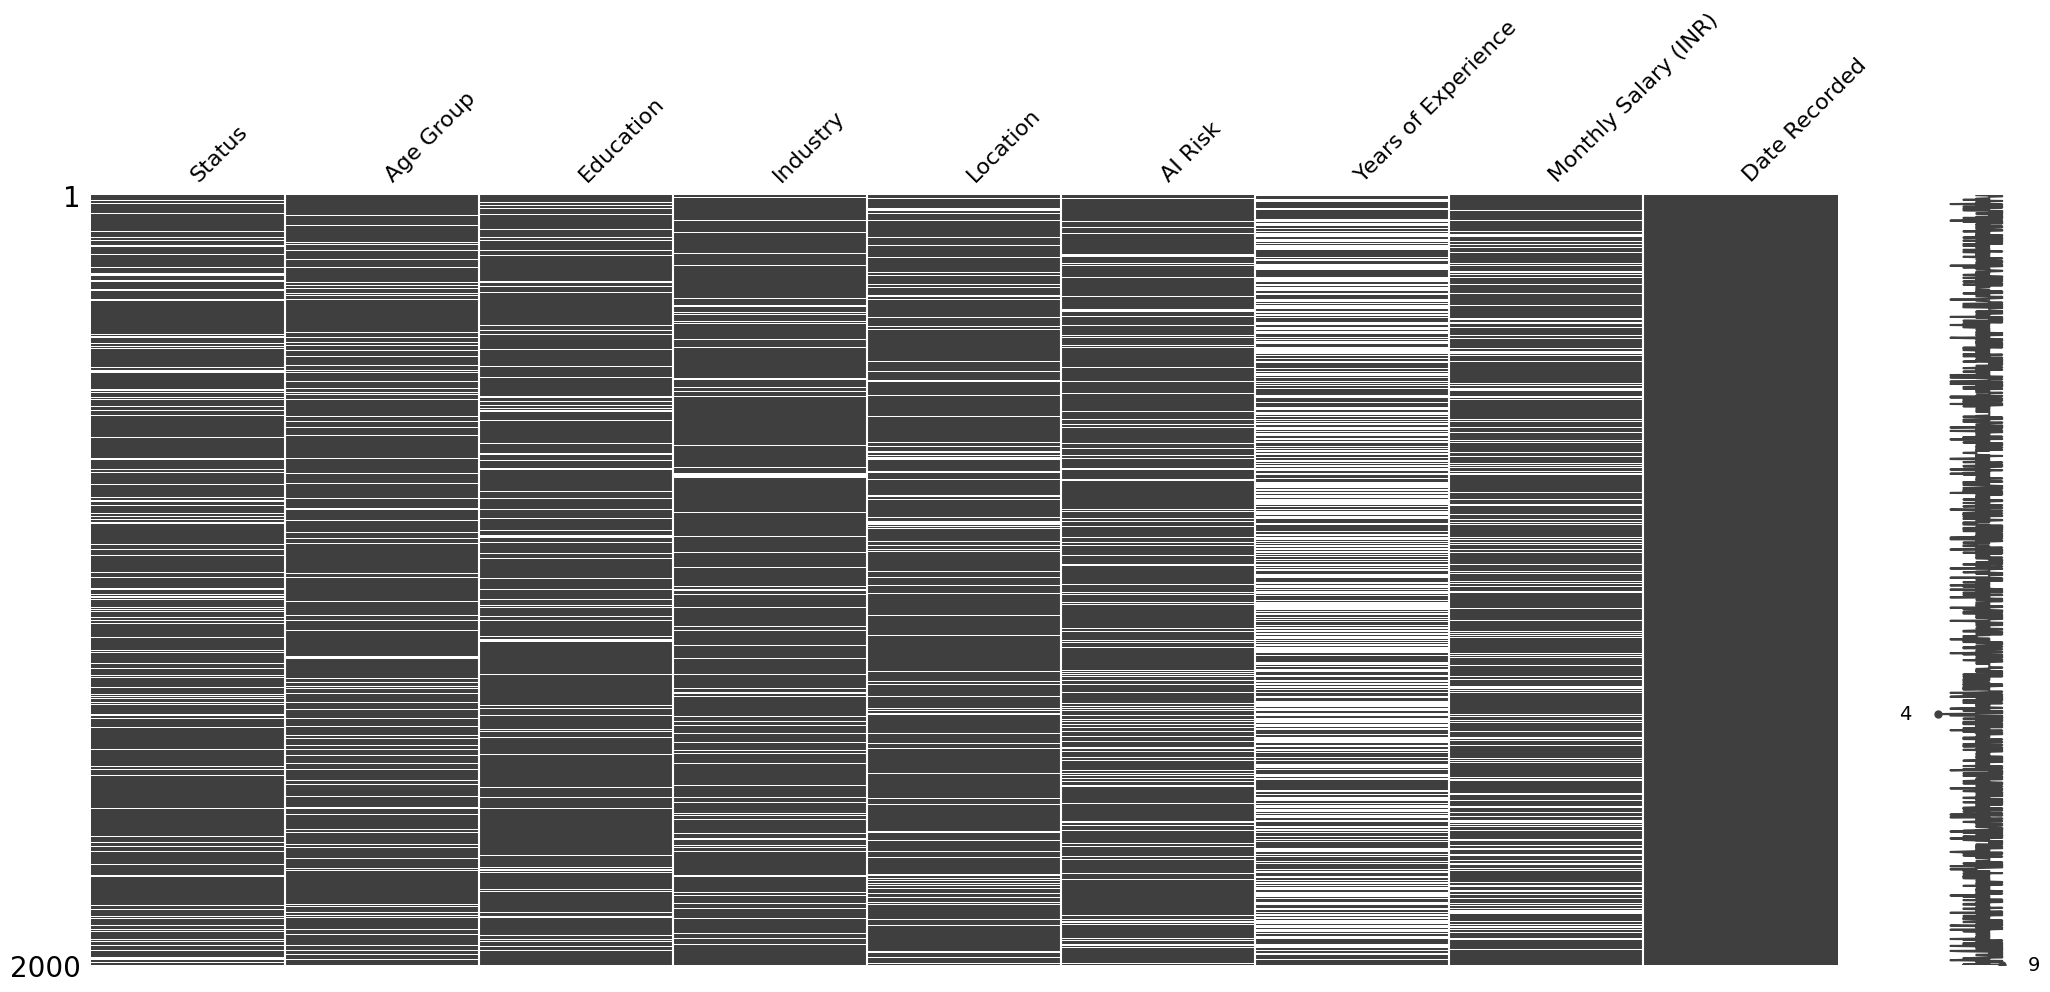

In [75]:
msno.matrix(
    df = df
)

<Axes: >

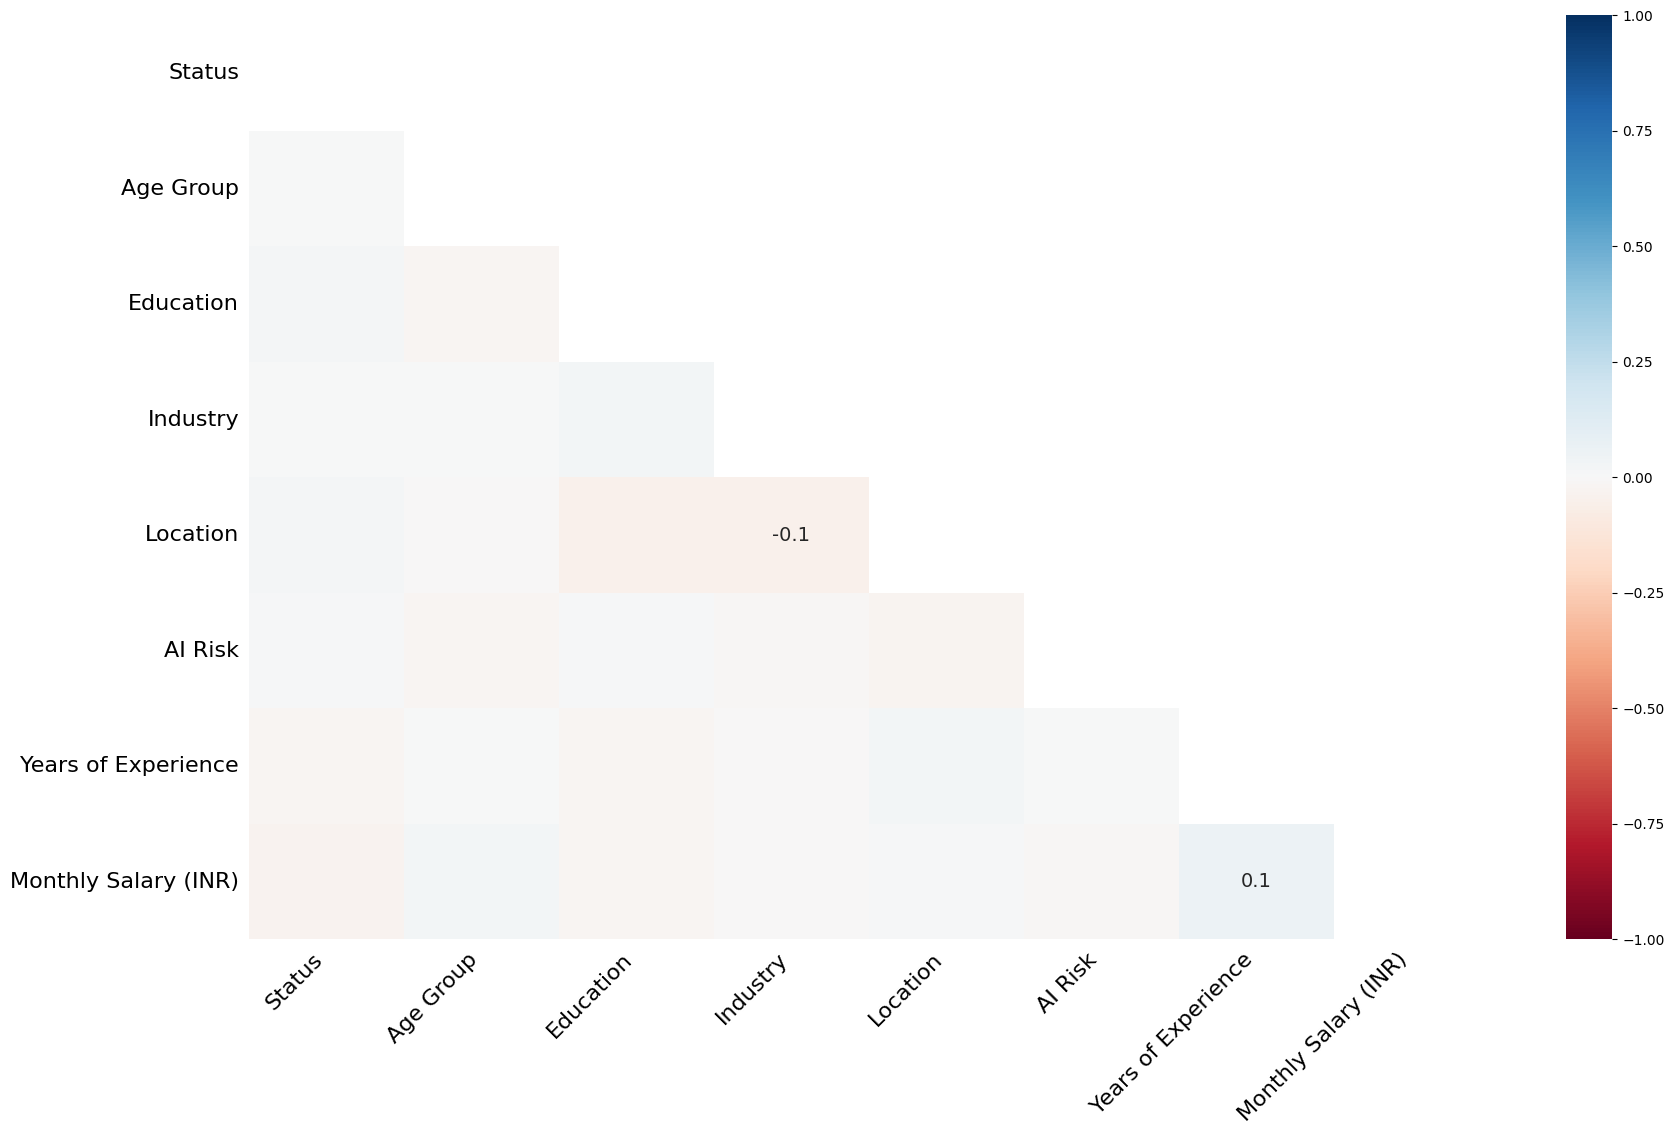

In [76]:
msno.heatmap(
    df = df
)

<Axes: >

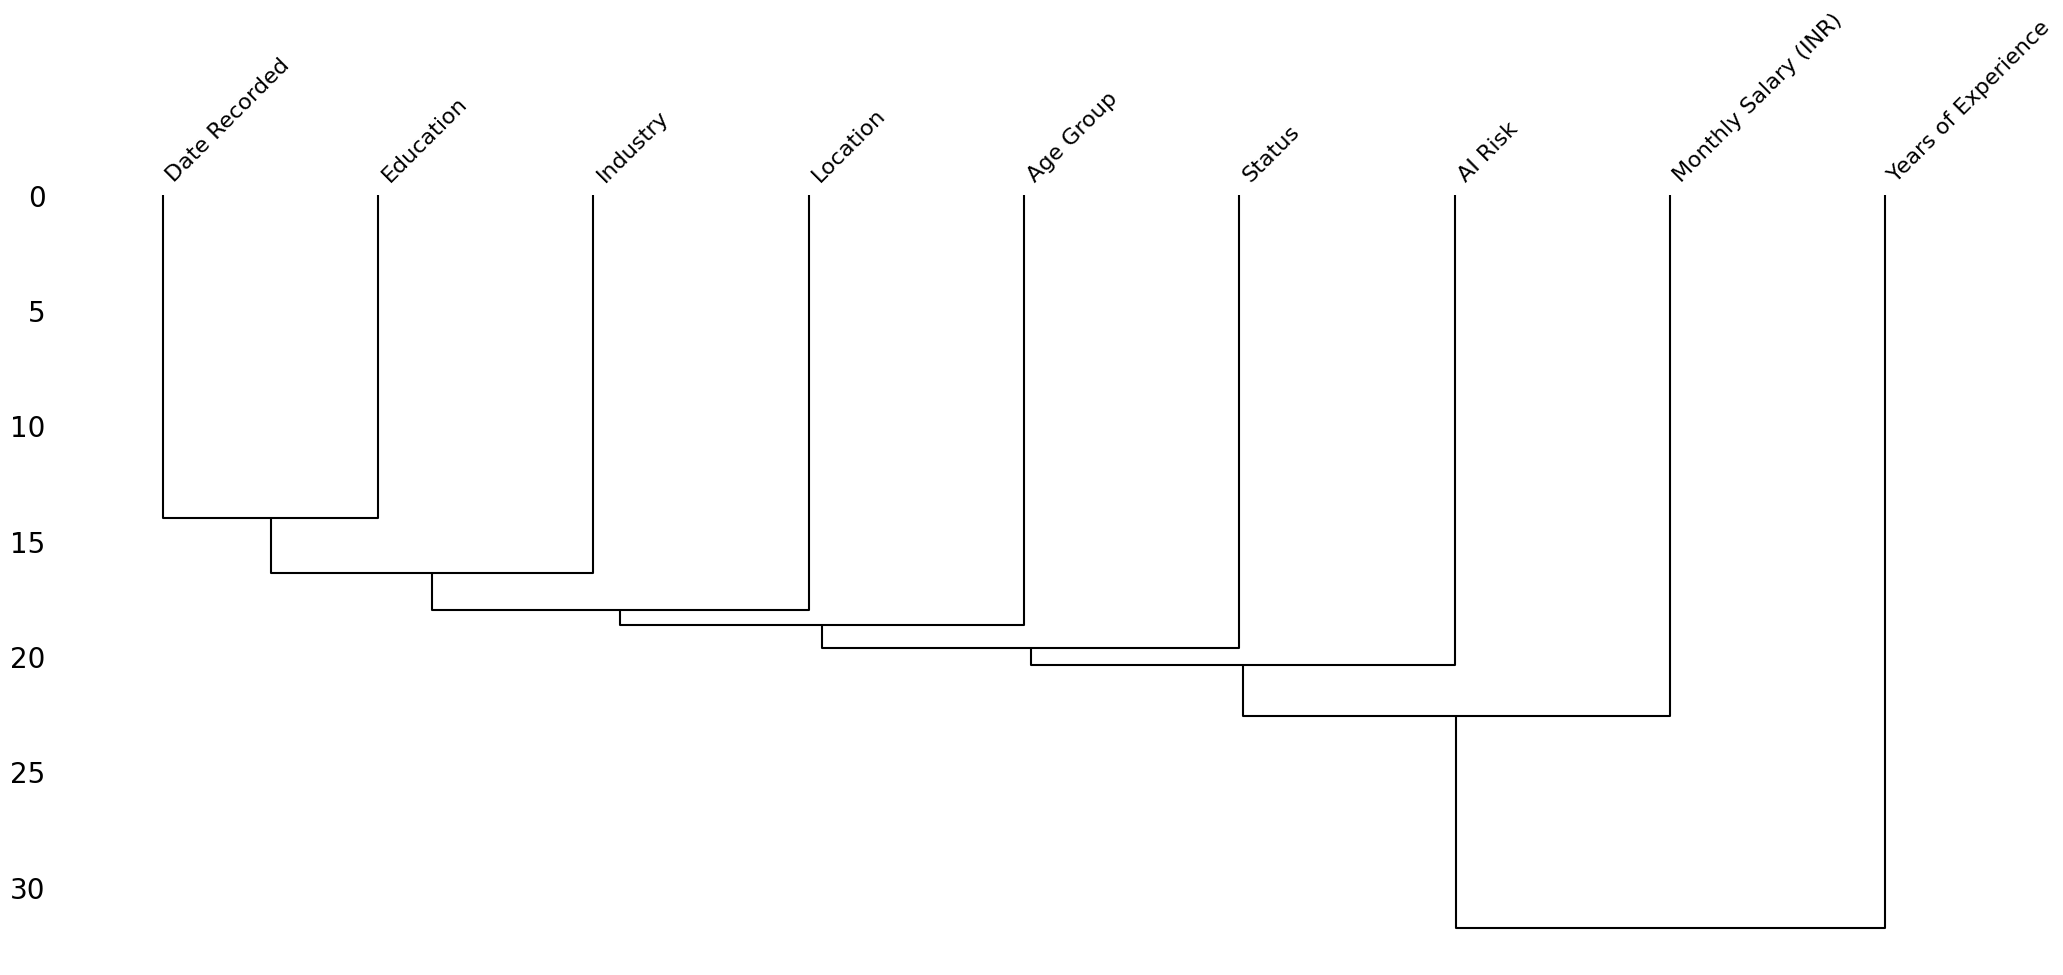

In [77]:
msno.dendrogram(
    df = df
)

<Axes: >

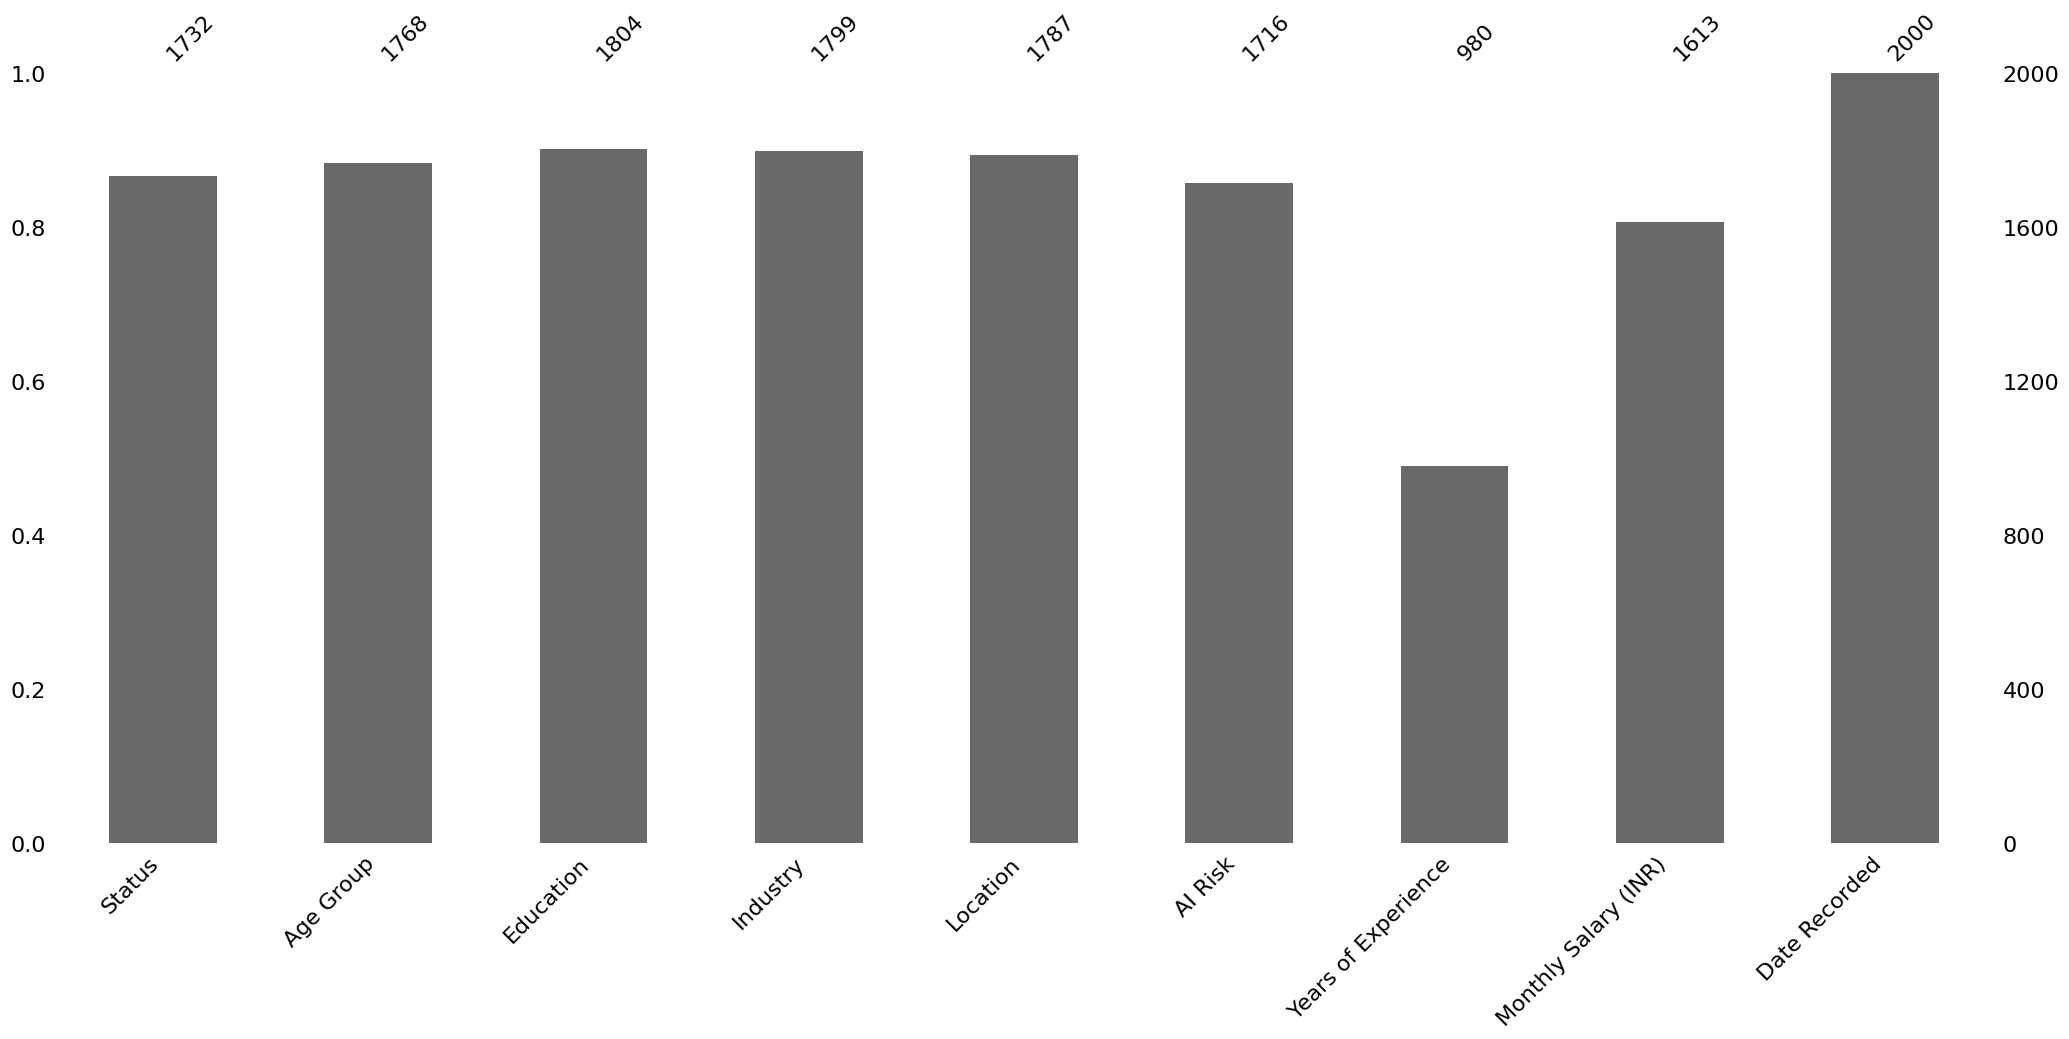

In [78]:
msno.bar(
    df = df
)

In [79]:
for x in df.columns:
    if len(df[x].unique()) < 15:
        print(f'For column {x} the unique values are : \n {df[x].unique()}\n')

For column Status the unique values are : 
 ['EMPLOYED' 'UNEMPLOYED' nan 'Unemployed' 'employed' 'unemployed'
 'Employed']

For column Age Group the unique values are : 
 ['25_34' '18-24' '45-54' '35 - 44' '55+' '25-34' '18 to 24' nan]

For column Education the unique values are : 
 ['high school' 'Diploma' 'High School' 'Masters' 'PhD' 'Master' 'Ph.D'
 'Bachelors' nan "Bachelor's"]

For column Industry the unique values are : 
 ['Technology' ' Fintech' 'Retail' 'Tech ' nan 'Health' 'Healthcare'
 'Education' 'Finance']

For column Location the unique values are : 
 ['Urban' 'rural' 'Delhi' 'Hyderabad' 'Bangalore' 'Mumbai' nan 'urban'
 'suburban']

For column AI Risk the unique values are : 
 [nan 'moderate' 'Low' 'low' 'HIGH' 'Medium' 'High']



In [80]:
df['Status'] = df['Status'].str.lower().map(
                                {
                                    'employed' : 1,
                                    'unemployed' : 0
                                }
)

In [96]:
df['AI Risk'] = df['AI Risk'].str.lower().str.strip().map(
                                {
                                    'low' : 0 , 
                                    'medium' : 1 ,
                                    'moderate' : 1 , 
                                    'high' : 2
                                }
)

In [102]:
df['Education'] = df['Education'].str.lower().str.strip().map(
                                {
                                    'high school' : 0 ,
                                    'diploma' : 1 ,
                                    'masters' : 3 , 
                                    'phd' : 4 ,
                                    'master' : 3 ,
                                    'ph.d' : 4 ,
                                    'bachelors' : 2 ,
                                    "bachelor's" : 2  
                                }
)

In [100]:
df['Education'].str.lower().unique()

array(['high school', 'diploma', 'masters', 'phd', 'master', 'ph.d',
       'bachelors', nan, "bachelor's"], dtype=object)